In [1]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno

C:\Users\ms\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df=pd.read_csv("report.csv")

In [3]:
df.head(5)

,index,activity_type,duration,from,to,comment
0,0,Video games,1:43,7/1/2017 21:34,7/1/2017 23:17,NaN
1,1,In computer,0:03,7/1/2017 21:29,7/1/2017 21:32,NaN
2,2,At home,13:35,7/1/2017 21:13,7/2/2017 10:49,NaN
3,3,In computer,0:05,7/1/2017 21:08,7/1/2017 21:13,NaN
4,4,Eat,0:18,7/1/2017 20:49,7/1/2017 21:07,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
index            151 non-null int64
activity_type    151 non-null object
duration         151 non-null timedelta64[ns]
from             151 non-null datetime64[ns]
to               151 non-null datetime64[ns]
comment          3 non-null object
dtypes: datetime64[ns](2), int64(1), object(2), timedelta64[ns](1)
memory usage: 7.2+ KB


In [5]:
df.shape


(151, 6)

In [4]:
df["from"]=pd.to_datetime(df["from"])
df["to"]=pd.to_datetime(df["to"])
df["duration"]=pd.to_timedelta(df.duration+':00')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
index            151 non-null int64
activity_type    151 non-null object
duration         151 non-null timedelta64[ns]
from             151 non-null datetime64[ns]
to               151 non-null datetime64[ns]
comment          3 non-null object
dtypes: datetime64[ns](2), int64(1), object(2), timedelta64[ns](1)
memory usage: 7.2+ KB


In [10]:
df_activity=df["activity_type"]
df_from =df["from"]
df_to=df["to"]

In [11]:
df_activity

0                               Video games
1                               In computer
2                                   At home
3                               In computer
4                                       Eat
5                               In computer
6                                       Eat
7                                     Sleep
8                                       Eat
9                               Watching TV
10                              In computer
11                              In computer
12                              In computer
13                                  At home
14                               In vehicle
15                                  Picnic 
16                               In vehicle
17                               In vehicle
18                                     Walk
19                                  Running
20                              Video games
21                                      Eat
22     Phone was out of the pock

In [12]:
df2=df.drop(columns=['index', 'comment'])

In [14]:
df3=df2.drop(columns=['to','duration'])

In [15]:
df3.head(3)

,activity_type,from
0,Video games,2017-07-01 21:34:00
1,In computer,2017-07-01 21:29:00
2,At home,2017-07-01 21:13:00


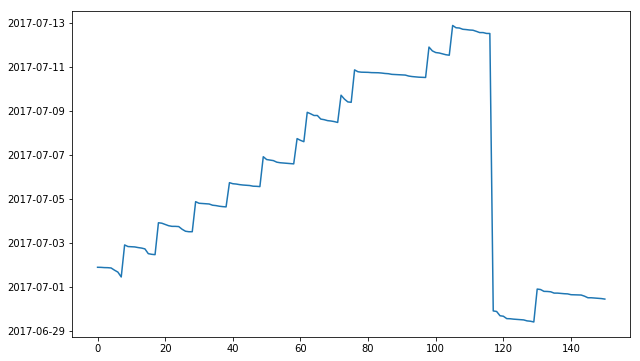

In [16]:
fig= plt.figure(figsize=(10,6))
plt.plot(df_from)
plt.show()

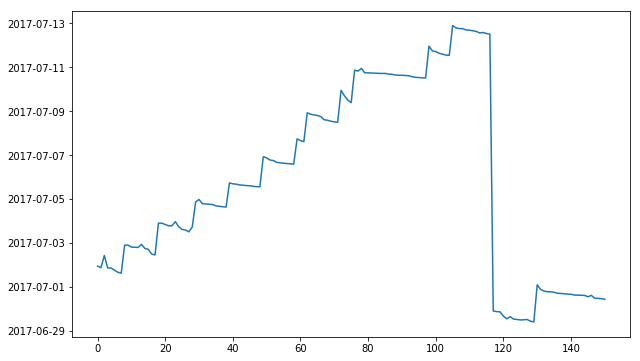

In [17]:
fig= plt.figure(figsize=(10,6))
plt.plot(df_to)
plt.show()

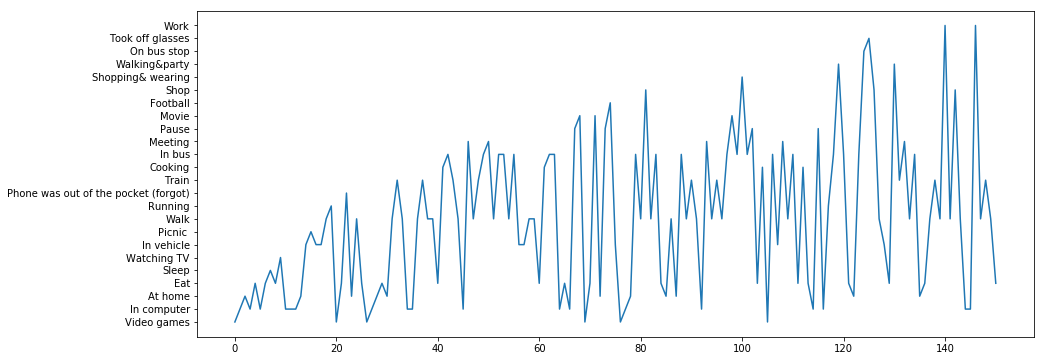

In [18]:
fig= plt.figure(figsize=(15,6))
plt.plot(df_activity) 
#fig= plt.figure(figsize=(20,20))
plt.show()

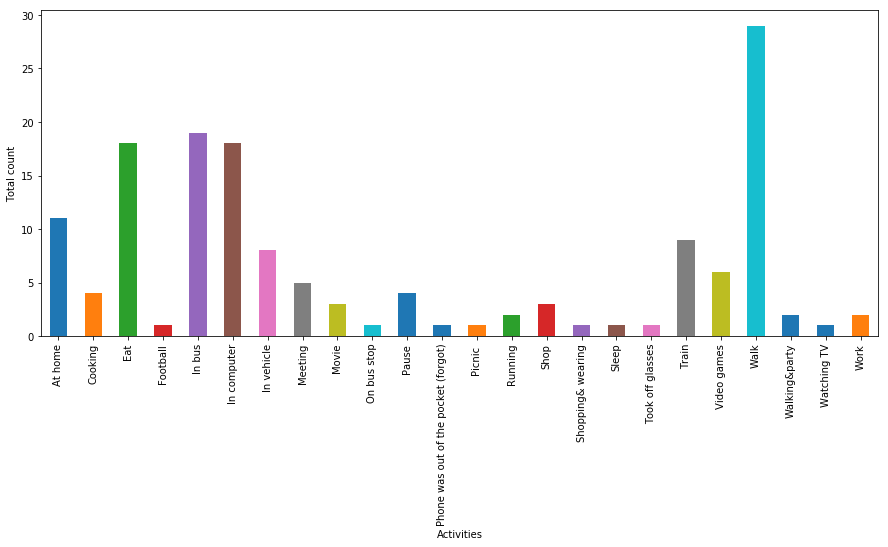

In [19]:
fig= plt.figure(figsize=(15,6))
count_activity = df3.groupby('activity_type').size().plot(kind='bar')
#print(count_activity)
#_= plt.hist('source')
_= plt.xlabel('Activities')
_=plt.ylabel('Total count')
plt.show()

In [20]:
df3["activity_type"].unique()

array(['Video games', 'In computer', 'At home', 'Eat', 'Sleep',
       'Watching TV', 'In vehicle', 'Picnic ', 'Walk', 'Running',
       'Phone was out of the pocket (forgot)', 'Train', 'Cooking',
       'In bus', 'Meeting', 'Pause', 'Movie', 'Football', 'Shop',
       'Shopping& wearing', 'Walking&party', 'On bus stop',
       'Took off glasses', 'Work'], dtype=object)

In [21]:
print( df3["activity_type"].value_counts())

Walk                                    29
In bus                                  19
In computer                             18
Eat                                     18
At home                                 11
Train                                    9
In vehicle                               8
Video games                              6
Meeting                                  5
Cooking                                  4
Pause                                    4
Movie                                    3
Shop                                     3
Running                                  2
Work                                     2
Walking&party                            2
On bus stop                              1
Picnic                                   1
Watching TV                              1
Football                                 1
Sleep                                    1
Took off glasses                         1
Phone was out of the pocket (forgot)     1
Shopping& w

In [22]:
df_input=pd.get_dummies(df3,prefix=['activity_type'])

In [23]:
df_input

,from,activity_type_At home,activity_type_Cooking,activity_type_Eat,activity_type_Football,activity_type_In bus,activity_type_In computer,activity_type_In vehicle,activity_type_Meeting,activity_type_Movie,...,activity_type_Shop,activity_type_Shopping& wearing,activity_type_Sleep,activity_type_Took off glasses,activity_type_Train,activity_type_Video games,activity_type_Walk,activity_type_Walking&party,activity_type_Watching TV,activity_type_Work
0,2017-07-01 21:34:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2017-07-01 21:29:00,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-07-01 21:13:00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-07-01 21:08:00,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-07-01 20:49:00,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2017-07-01 18:26:00,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2017-07-01 16:20:00,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2017-07-01 11:00:00,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,2017-07-02 21:55:00,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2017-07-02 20:10:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
df_to=np.array(df_to)

In [25]:
df_to

array(['2017-07-01T23:17:00.000000000', '2017-07-01T21:32:00.000000000',
       '2017-07-02T10:49:00.000000000', '2017-07-01T21:13:00.000000000',
       '2017-07-01T21:07:00.000000000', '2017-07-01T18:46:00.000000000',
       '2017-07-01T16:33:00.000000000', '2017-07-01T15:31:00.000000000',
       '2017-07-02T22:05:00.000000000', '2017-07-02T22:10:00.000000000',
       '2017-07-02T20:02:00.000000000', '2017-07-02T19:51:00.000000000',
       '2017-07-02T19:38:00.000000000', '2017-07-02T23:00:00.000000000',
       '2017-07-02T18:28:00.000000000', '2017-07-02T17:35:00.000000000',
       '2017-07-02T12:21:00.000000000', '2017-07-02T11:25:00.000000000',
       '2017-07-03T22:09:00.000000000', '2017-07-03T22:06:00.000000000',
       '2017-07-03T20:43:00.000000000', '2017-07-03T19:13:00.000000000',
       '2017-07-03T19:20:00.000000000', '2017-07-03T23:45:00.000000000',
       '2017-07-03T18:10:00.000000000', '2017-07-03T15:14:00.000000000',
       '2017-07-03T14:35:00.000000000', '2017-07-03

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_to= scaler.fit_transform(df_to.reshape(-1,1))

C:\Users\ms\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype datetime64[ns] was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
normalized_to

array([[0.18852375],
       [0.18311528],
       [0.22416813],
       [0.1821366 ],
       [0.18182755],
       [0.17456475],
       [0.16771402],
       [0.16452045],
       [0.25898836],
       [0.25924591],
       [0.25265272],
       [0.25208612],
       [0.2514165 ],
       [0.26182137],
       [0.24781086],
       [0.24508087],
       [0.22890697],
       [0.22602246],
       [0.33336767],
       [0.33321315],
       [0.32893788],
       [0.32430205],
       [0.32466261],
       [0.33831256],
       [0.32105697],
       [0.31199135],
       [0.30998249],
       [0.30405893],
       [0.32033584],
       [0.40481096],
       [0.41320696],
       [0.3988874 ],
       [0.39796023],
       [0.39682703],
       [0.39605439],
       [0.39172762],
       [0.39002781],
       [0.38889461],
       [0.38750386],
       [0.46904296],
       [0.46584939],
       [0.46471618],
       [0.46219223],
       [0.46126507],
       [0.45992583],
       [0.45951375],
       [0.45765942],
       [0.456

In [29]:
train_sample=normalized_to

In [30]:
df_activity=pd.get_dummies(df_activity)

In [32]:
df_activity

,At home,Cooking,Eat,Football,In bus,In computer,In vehicle,Meeting,Movie,On bus stop,...,Shop,Shopping& wearing,Sleep,Took off glasses,Train,Video games,Walk,Walking&party,Watching TV,Work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
train_label=np.array(df_activity)

In [36]:
train_label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [37]:
train_label.shape

(151, 24)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(normalized_to, train_label, test_size = 0.2, random_state = 0)

In [39]:
X_test.shape

(31, 1)

In [40]:
X_train.shape

(120, 1)

In [42]:
 Y_train.shape

(120, 24)

In [43]:
Y_test.shape

(31, 24)